# Exc Data structuring

In [2]:
%matplotlib inline 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

# Increases the plot size a little
mpl.rcParams['figure.figsize'] = 11, 6b

In [32]:
def weerbericht(url):
    df_w = pd.read_csv(url,
                         compression='gzip', 
                         header=None).iloc[:,:4]
    df_w.columns = ['station', 'datetime', 'obs_type', 'obs_value']
    df_w['obs_value'] = df_w['obs_value'] / 10
    df_w.datetime = pd.to_datetime(df_w.datetime.astype(str))
    month = df_w.datetime.dt.month
    df_w = df_w.assign(Month=month)
    df_w = df_w.set_index(pd.DatetimeIndex(df_w.datetime))
    country_id = df_w.station.str[:3]
    df_w = df_w.assign(Country_id=country_id)
    df_w = df_w.loc[df_w['obs_type'] == 'TMAX']
    return df_w
    
dataframe = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz')
dataframe.head()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1,ITE
1864-01-01,ASN00086071,1864-01-01,TMAX,21.4,1,ASN
1864-01-01,CA006158350,1864-01-01,TMAX,1.1,1,CA0
1864-01-01,EIE00101859,1864-01-01,TMAX,9.4,1,EIE
1864-01-01,BE000006447,1864-01-01,TMAX,-2.3,1,BE0


In [35]:
newdataframe = dataframe.loc[dataframe['station'] == 'ITE00100550']
newdataframe.head()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1864-01-01,ITE00100550,1864-01-01,TMAX,1.0,1,ITE
1864-01-02,ITE00100550,1864-01-02,TMAX,0.8,1,ITE
1864-01-03,ITE00100550,1864-01-03,TMAX,-2.8,1,ITE
1864-01-04,ITE00100550,1864-01-04,TMAX,0.0,1,ITE
1864-01-05,ITE00100550,1864-01-05,TMAX,-1.9,1,ITE


In [41]:
tempdata = newdataframe\
            .groupby(newdataframe.Month)\
            ['obs_value']\
            .describe()
tempdata.head()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,31.0,-0.077419,3.064605,-6.3,-2.200,0.00,1.90,5.3
2,29.0,4.134483,3.031652,-1.8,1.500,4.40,6.80,8.4
3,31.0,12.200000,2.780408,7.9,10.050,12.10,14.15,18.0
4,30.0,16.243333,4.487199,6.3,14.425,16.25,18.40,25.1
5,31.0,21.470968,3.312622,14.0,19.500,21.10,23.80,27.0


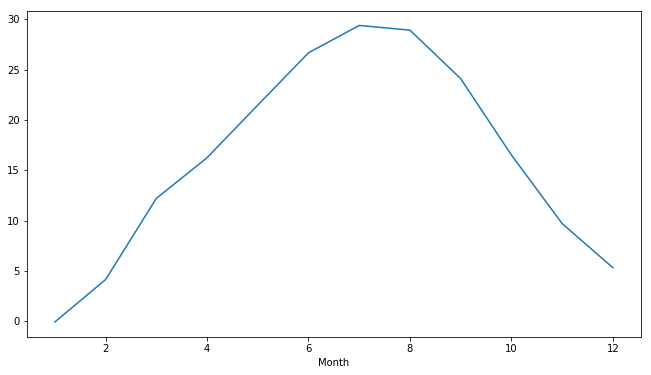

In [56]:
tempdata['mean'].plot()

In [61]:
df1864 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz')
df1865 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1865.csv.gz')
df1866 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1866.csv.gz')
df1867 = weerbericht('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1867.csv.gz')

In [65]:
df_total = pd.concat([df1864, df1865, df1866, df1867])
df_total.tail()

,station,datetime,obs_type,obs_value,Month,Country_id
datetime,,,,,,
1867-12-31,CA006101872,1867-12-31,TMAX,-3.9,12,CA0
1867-12-31,CA006137735,1867-12-31,TMAX,-1.1,12,CA0
1867-12-31,ASN00090015,1867-12-31,TMAX,16.7,12,ASN
1867-12-31,UK000056225,1867-12-31,TMAX,-0.5,12,UK0
1867-12-31,SZ000006717,1867-12-31,TMAX,-15.8,12,SZ0


In [76]:
urltext = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
newdata = pd.read_fwf(urltext, header=None)
newdata.head()

,0,1,2,3,4,5,6,7
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0


In [79]:
newcolumns = ['station', 'latitude', 'longitude', 'elevation', 'state', 'name', 'gsn flag', 'wmo id']
newdata.columns = newcolumns
newdata.head()

,station,latitude,longitude,elevation,state,name,gsn flag,wmo id
0,ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP,NaN,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,NaN,NaN,41217.0


In [84]:
total_df = pd.merge(df_total, newdata, left_on='station', right_on='station')
total_df.tail()
total_df.shape

(29638, 13)